# Drawing the multipanel barplot for Q100 Africa

In [1]:
ensembles = c('CORDEX', 'CMIP5', 'CMIP6')
GWLs = c('1.5','2','4')
scenarios = c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')

data = list()
for (ensemble in ensembles){
    data[[ensemble]] = list()
    for (GWL in GWLs){
        data[[ensemble]][[GWL]] = list()
    }
    for (scenario in scenarios){
        data[[ensemble]][[scenario]] = list()
    }

}

## 1. Get the data from the json files

In [2]:
library(rjson)

Warning message:
“package ‘rjson’ was built under R version 3.6.3”


### Prepare R list with all the regions => Get the regions list from the CMIP6 json file, for GWL 1.5K

In [3]:
# -- List of regions for AFRICA
continent_regions = c('ECA','TIB','EAS','ARP','SAS','SEA')

regions_by_continent = list(
    SEA = c('SEA'),
    WAS = c('ARP','SAS'),#,'TIB'],
    EAS = c('TIB','ECA','EAS')
    )


all_regions = list()
GWLs = c('1.5','2','4')
scenarios = c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')

for (region_name in continent_regions){
    all_regions[[region_name]] = list()
    for (ensemble in c('CMIP6','CMIP5','CORDEX')){
        all_regions[[region_name]][[ensemble]] = list()
        for (GWL in GWLs){
            all_regions[[region_name]][[ensemble]][[GWL]] = list()
        }#end for GWL
        for (scenario in scenarios){
            all_regions[[region_name]][[ensemble]][[scenario]] = list()
        }#end for scenario
    }#end for ensemble
}#end for region_name


### Function to read in the data in the txt files provided by ICTP (Fabio Di Sante)

In [4]:
"metrics_reader"=function(metrics_filename){
    
    # -- Read the metrics file provided by Fabio
    lines=readLines(file(metrics_filename,open="r"))
    dat = c()
    for (elt in lines){
        tmp = gsub(' ','', elt)
        dat = c(dat, tmp)
    }#end for elt
    # -- Each region has 4 lines => the number of regions is the length / 4
    nregions = length(dat)/4
    # -- Store the results in res
    res = list()
    for (i in 1:nregions){
        # -- Calculate the index of the region name
        startind = (i-1)*4 + 1
        resname = dat[startind]
        print(resname)
        p10 = as.numeric(dat[startind+1])
        median = as.numeric(dat[startind+2])
        p90 = as.numeric(dat[startind+3])
        print(c(p10,median,p90))
        res[[resname]] = c(p10, median, p90)
    }
    return(res)
}

### Read in CMIP6 data

In [5]:
ensemble = 'CMIP6'

for (continent in names(regions_by_continent)){
    print(paste(continent,'==> '))
    print(regions_by_continent[[continent]])
    
    # -- Recent past raw value
    clim_period = 'modern_raw'
    wclim_period='ssp585_1995-2014'
    if (continent=='EUR_MaskDesert'){
        wcontinent='EUR'
    }else{
        wcontinent=continent
    }
    metrics_filename = paste('/home/jservon/Chapter12_IPCC/data/Figure_12.6/Q100_',ensemble,'/Q100_',wclim_period,'.nc_',wcontinent,'.txt',sep='')
    print(paste('Raw values :', metrics_filename))
    res_metrics_by_AR6region = metrics_reader(metrics_filename)
    for (region_name in names(res_metrics_by_AR6region)){
        all_regions[[region_name]][[ensemble]][[clim_period]][['vals']] = res_metrics_by_AR6region[[region_name]]
    }
     
    # -- Differences for future time periods and GWLs
    for (clim_period in c('2.6_mid', '8.5_mid', '2.6_late', '8.5_late','1.5','2','4')){
        if (clim_period=='2.6_mid'){ wclim_period='ssp126_mid' }
        if (clim_period=='2.6_late'){ wclim_period='ssp126_far' }
        if (clim_period=='8.5_mid'){ wclim_period='ssp585_mid' }
        if (clim_period=='8.5_late'){ wclim_period='ssp585_far' }
        if (clim_period=='1.5'){ wclim_period='1.5' }
        if (clim_period=='2'){ wclim_period='2.0' }
        if (clim_period=='4'){ wclim_period='4.0' }
        
        metrics_filename = paste('/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_',ensemble,'/',wclim_period,'_',continent,'.txt',sep='')
        print(metrics_filename)
        res_metrics_by_AR6region = metrics_reader(metrics_filename)
        for (region_name in names(res_metrics_by_AR6region)){
            all_regions[[region_name]][[ensemble]][[clim_period]][['vals']] = res_metrics_by_AR6region[[region_name]]
        }
    }#end for clim_period
    
    
}#end for continent

[1] "SEA ==> "
[1] "SEA"
[1] "Raw values : /home/jservon/Chapter12_IPCC/data/Figure_12.6/Q100_CMIP6/Q100_ssp585_1995-2014.nc_SEA.txt"
[1] "SEA"
[1] 0.133980 0.562739 1.128880
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CMIP6/ssp126_mid_SEA.txt"
[1] "SEA"
[1] -0.000163216  0.066859000  0.139055000
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CMIP6/ssp585_mid_SEA.txt"
[1] "SEA"
[1] 0.0188255 0.0595732 0.2599310
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CMIP6/ssp126_far_SEA.txt"
[1] "SEA"
[1] 0.00260717 0.06864200 0.14159900
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CMIP6/ssp585_far_SEA.txt"
[1] "SEA"
[1] 0.0422749 0.2206000 0.5606740
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CMIP6/1.5_SEA.txt"
[1] "SEA"
[1] 0.00894939 0.03092790 0.08878030
[1] "/home/jservon/Chapter12_IPCC/dat

### Read in CMIP5 data

In [6]:
ensemble = 'CMIP5'

for (continent in names(regions_by_continent)){
    print(paste(continent,'==> '))
    print(regions_by_continent[[continent]])
    
    # -- Recent past raw value
    clim_period = 'modern_raw'
    wclim_period='rcp85_1995-2014'
    if (continent=='EUR_MaskDesert'){
        wcontinent='EUR'
    }else{
        wcontinent=continent
    }
    metrics_filename = paste('/home/jservon/Chapter12_IPCC/data/Figure_12.6/Q100_',ensemble,'/Q100_',wclim_period,'.nc_',wcontinent,'.txt',sep='')
    print(paste('Raw values :', metrics_filename))
    res_metrics_by_AR6region = metrics_reader(metrics_filename)
    for (region_name in names(res_metrics_by_AR6region)){
        all_regions[[region_name]][[ensemble]][[clim_period]][['vals']] = res_metrics_by_AR6region[[region_name]]
    }
     
    # -- Differences for future time periods and GWLs
    for (clim_period in c('2.6_mid', '8.5_mid', '2.6_late', '8.5_late','1.5','2','4')){
        if (clim_period=='2.6_mid'){ wclim_period='rcp26_mid' }
        if (clim_period=='2.6_late'){ wclim_period='rcp26_far' }
        if (clim_period=='8.5_mid'){ wclim_period='rcp85_mid' }
        if (clim_period=='8.5_late'){ wclim_period='rcp85_far' }
        if (clim_period=='1.5'){ wclim_period='1.5' }
        if (clim_period=='2'){ wclim_period='2.0' }
        if (clim_period=='4'){ wclim_period='4.0' }
        
        metrics_filename = paste('/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_',ensemble,'/',wclim_period,'_',continent,'.txt',sep='')
        print(metrics_filename)
        res_metrics_by_AR6region = metrics_reader(metrics_filename)
        for (region_name in names(res_metrics_by_AR6region)){
            all_regions[[region_name]][[ensemble]][[clim_period]][['vals']] = res_metrics_by_AR6region[[region_name]]
        }
    }#end for clim_period
    
    
}#end for continent

[1] "SEA ==> "
[1] "SEA"
[1] "Raw values : /home/jservon/Chapter12_IPCC/data/Figure_12.6/Q100_CMIP5/Q100_rcp85_1995-2014.nc_SEA.txt"
[1] "SEA"
[1] 0.283145 0.531375 1.577890
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CMIP5/rcp26_mid_SEA.txt"
[1] "SEA"
[1] 0.0214085 0.0386356 0.0967373
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CMIP5/rcp85_mid_SEA.txt"
[1] "SEA"
[1] 0.0146572 0.0942712 0.3998710
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CMIP5/rcp26_far_SEA.txt"
[1] "SEA"
[1] -0.0119828  0.0336498  0.0751601
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CMIP5/rcp85_far_SEA.txt"
[1] "SEA"
[1] -0.000586498  0.237947000  0.870144000
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CMIP5/1.5_SEA.txt"
[1] "SEA"
[1] 0.00298389 0.02968670 0.17255500
[1] "/home/jservon/Chapter12_IPCC/data/PER

### Read in CORDEX data

In [7]:
ensemble = 'CORDEX'
wensemble = paste(ensemble,'-core',sep='')

for (continent in names(regions_by_continent)){
    print(paste(continent,'==> '))
    print(regions_by_continent[[continent]])
    
    # -- Recent past raw value
    clim_period = 'modern_raw'
    wclim_period='rcp85_1995-2014'
    if (continent=='EUR_MaskDesert'){
        wcontinent='EUR'
    }else{
        wcontinent=continent
    }
    metrics_filename = paste('/home/jservon/Chapter12_IPCC/data/Figure_12.6/Q100_',wensemble,'/Q100_',wclim_period,'.nc_',wcontinent,'.txt',sep='')
    print(paste('Raw values :', metrics_filename))
    res_metrics_by_AR6region = metrics_reader(metrics_filename)
    for (region_name in names(res_metrics_by_AR6region)){
        all_regions[[region_name]][[ensemble]][[clim_period]][['vals']] = res_metrics_by_AR6region[[region_name]]
    }
     
    # -- Differences for future time periods and GWLs
    for (clim_period in c('2.6_mid', '8.5_mid', '2.6_late', '8.5_late','1.5','2','4')){
        if (clim_period=='2.6_mid'){ wclim_period='rcp26_mid' }
        if (clim_period=='2.6_late'){ wclim_period='rcp26_far' }
        if (clim_period=='8.5_mid'){ wclim_period='rcp85_mid' }
        if (clim_period=='8.5_late'){ wclim_period='rcp85_far' }
        if (clim_period=='1.5'){ wclim_period='1.5' }
        if (clim_period=='2'){ wclim_period='2.0' }
        if (clim_period=='4'){ wclim_period='4.0' }
        
        metrics_filename = paste('/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_',wensemble,'/',wclim_period,'_',continent,'.txt',sep='')
        print(metrics_filename)
        res_metrics_by_AR6region = metrics_reader(metrics_filename)
        for (region_name in names(res_metrics_by_AR6region)){
            all_regions[[region_name]][[ensemble]][[clim_period]][['vals']] = res_metrics_by_AR6region[[region_name]]
        }
    }#end for clim_period
    
    
}#end for continent

[1] "SEA ==> "
[1] "SEA"
[1] "Raw values : /home/jservon/Chapter12_IPCC/data/Figure_12.6/Q100_CORDEX-core/Q100_rcp85_1995-2014.nc_SEA.txt"
[1] "SEA"
[1] 1.53904 1.58142 3.00279
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CORDEX-core/rcp26_mid_SEA.txt"
[1] "SEA"
[1] -0.0130647  0.0195117  0.3659600
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CORDEX-core/rcp85_mid_SEA.txt"
[1] "SEA"
[1] -0.0132953  0.2200940  0.4788060
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CORDEX-core/rcp26_far_SEA.txt"
[1] "SEA"
[1] -0.0764979  0.0978644  0.3517370
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CORDEX-core/rcp85_far_SEA.txt"
[1] "SEA"
[1] 0.618162 0.983168 1.479050
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CORDEX-core/1.5_SEA.txt"
[1] "SEA"
[1] -0.1117610  0.0958557  0.3274000
[1] "/home/jser

## Attribute the colors

In [8]:
for (region_name in continent_regions){
    ensemble = 'CMIP6'
    all_regions[[region_name]][[ensemble]][['modern_raw']][['color']] = 'black'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue4'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'red'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue4'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'red'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'darkorchid4'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'darkorange'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'tan4'

    ensemble = 'CMIP5'
    all_regions[[region_name]][[ensemble]][['modern_raw']][['color']] = 'grey40'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue3'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'lightcoral'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue3'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'lightcoral'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'darkorchid3'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'sandybrown'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'peachpuff4'

    ensemble = 'CORDEX'
    all_regions[[region_name]][[ensemble]][['modern_raw']][['color']] = 'grey60'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'lightpink'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'lightpink'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'mediumpurple1'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'navajowhite2'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'peachpuff3'
}#end for region_name

### Function to draw the barplot

In [9]:
"vert_scale"=function(val, ylim){
    return( (val - ylim[1]) / (ylim[2] - ylim[1]) )
}


"barplot_satellite_chap12"=function(data, title, ylabel, ylims, do_xlab='TRUE', 
                                    do_ylab_raw='TRUE', do_ylab_diff='TRUE', mar=c(4,3,2.5,1)){
    #
    # -- Names
    ensembles = c('CORDEX','CMIP5', 'CMIP6')
    GWLs = c('1.5','2','4')
    scenarios = c('2.6_mid', '8.5_mid', '2.6_late', '8.5_late')
    nhorizons = length(GWLs)+length(scenarios)
    
    ylim_base = c(0,1)
    #
    ylim_raw = ylims[['ylim_raw']]
    ylim_raw_levels = ylims[['ylim_raw_levels']]
    ylim_diff = ylims[['ylim_diff']]
    ylim_diff_levels = ylims[['ylim_diff_levels']]    
        
    ylim = ylim_base
    
    # -- position on the x axis of the ensembles
    # RP, GWL 1.5, 2, 4, mid, long
    xpos = c(1, 2,3,4, 5,6, 7,8)
    xvert = c(1.5, 2.5,3.5,4.5, 6.5)
    inner_margin = 0.5
    xlim = c(1-inner_margin, max(xpos)+inner_margin)
    general_cex=1.3
    par(cex=general_cex)
    par(mar=mar)
    plot(1:nhorizons, rep(NA, nhorizons), col='white', ylim=ylim, xlim=xlim,
         xaxt='n', yaxt='n', xlab='', ylab='', xaxs="i", yaxs='i', font=2)
    mtext(ylabel, 2, font=2, line=2.2, cex=general_cex)
    #     cex.axis=1.2, cex.lab=1.5, font=2)
    par(xpd=NA)
    par(font=2)
    
    # -- Add horizontal lines for diff
    for (yval in vert_scale(ylim_diff_levels, ylim_diff)){
        if (yval==vert_scale(0,ylim_diff)){
            lines(c(xvert[1],xlim[2]),rep(yval,2),type='l',lwd=2)
        }else{
            lines(c(xvert[1],xlim[2]),rep(yval,2),type='l', lty=2)
        }
    }
    
    delta = 0.24 # - space between CMIP6/CMIP5/CORDEX
    # -- Plot data
    # -- Plot baseline
    i = 1
    for (horizon in c('modern_raw',GWLs, scenarios)){
        j = xpos[i] - delta
        for (ensemble in ensembles){
            print(paste(horizon, ensemble))
            if (horizon=='modern_raw'){
                dat = vert_scale(data[[ensemble]][[horizon]][['vals']], ylim_raw)
            }else{
                dat = vert_scale(data[[ensemble]][[horizon]][['vals']], ylim_diff)
            }
            print(dat)
            if (is.null(dat)){dat = c(NA,NA,NA)}
            col = data[[ensemble]][[horizon]][['color']]
            lines(rep(j,2), c(dat[1],dat[3]), type='l', col=col, lwd=4)
            points(j, dat[2], cex=1.5, pch=16, col=col)
            j = j + delta
        }
        i = i + 1
    }

    
    # -- Y axis raw
    yvals = ylim_raw_levels
    dumyvals = vert_scale(yvals, ylim_raw)
    ylabels = yvals
    par(cex=2.4)
    axis(2, at=dumyvals, labels=rep('',length(yvals)))
    if (do_ylab_raw=='TRUE'){
        axis(2, pos=0.75, at=dumyvals, tick='FALSE', labels=ylabels, las=1)
    }
    par(cex=general_cex)
    
    # -- Y axis Differences
    yvals = ylim_diff_levels
    dumyvals = vert_scale(yvals, ylim_diff)
    ylabels = yvals
    par(cex=2.2)
    axis(4, at=dumyvals, labels=rep('',length(yvals)))
    if (do_ylab_diff=='TRUE'){
        axis(4, pos=xlim[2]-0.25, at=dumyvals, labels=ylabels, las=1, tick='FALSE')
    }
    par(cex=general_cex)
    

    # -- X axis
    if (do_xlab=='FALSE'){
        axis(1, at=xvert, labels=rep('',length(xvert)))
    }
    # -- Title
    mtext(title,3, font=2, cex=3, line=0.5)

    bline = ylim[1] - 0.22*(ylim[2]-ylim[1])
    #
    # -- X axis
    if (do_xlab=='FALSE'){
        axis(1, at=xvert, labels=rep('',length(xvert)))
    }

    # -- Vertical lines
    vline = ylim
    vline[1] = ylim[1] - (ylim[2]-ylim[1])*0.16
    if (do_xlab=='TRUE'){
        for (v in xvert){lines(c(v,v),vline,type='l', lwd=1)}
    }else{
        for (v in xvert){lines(c(v,v),ylim,type='l')}
    }
    # Make a thicker line to separate r.past from the rest
    vline = ylim
    v = xvert[1]
    lines(c(v,v),vline,type='l', lwd=3)
    

    if (do_xlab=='TRUE'){
        cex_text = 1.8
        bline = ylim[1] - 0.2*(ylim[2]-ylim[1])
        #
        # -- Labels GWLs
        GWLs_range = c(1.5,4.35)
        btext = ylim[1] - 0.3*(ylim[2]-ylim[1])
        lines(GWLs_range, c(bline,bline), type='l', lwd=3)
        text(mean(GWLs_range),btext,expression("GWL"), font=1, cex=cex_text*0.9)

        btext2 = ylim[1] - 0.10*(ylim[2]-ylim[1])
        text(1,btext2-0.12,"r.past.", cex=cex_text, font=1, srt=90, adj=c(0.5,0.5))
        text(2,btext2,"1.5", cex=cex_text, font=1, adj=c(0.5,0.5))#, srt=90
        text(3,btext2,"2", cex=cex_text, font=1, adj=c(0.5,0.5))#, srt=90
        text(4,btext2,"4", cex=cex_text, font=1, adj=c(0.5,0.5))#, srt=90

        # -- Labels time slices = modern, mid-term, long-term
        xmodern = 4.5
        xmid = 5.5
        xlate = 7.5
        text(xmid,btext2, "mid.", font=1, cex=cex_text, adj=c(0.5,0.5))#, srt=90
        text(xlate,btext2, "long.", font=1, cex=cex_text, adj=c(0.5,0.5))#, srt=90

        time_slices = c(4.65,8.5)
        lines(time_slices, c(bline,bline), type='l', lwd=3)
        text(mean(time_slices),btext,"Time slices", font=1, cex=cex_text)
    }#end if do_ylab
    
    
}


### Function to draw a horizontal legend

In [10]:
"draw_legend_box_hor"=function(data, mar=c(0,0,0,0)){

    par(mar=mar)
    plot(0:1,0:1,col='white',xaxt='n',yaxt='n', xlab='', ylab='')#, bty='n')
    text(-0.02,0.88, "Legend", font=2, cex=2, adj=0)
    linewidth = 0.07
    lwd=13
    xcol1 = 0.2
    ycol1 = 0.48
    space_between_cols = linewidth*1.5
    space_between_lines = 0.2
    ycol = ycol1
    xensemble = xcol1 - 0.05
    xensemble = xcol1 - 0.05
    cex_text = 1.7
    cex_title = 1.9
    for (ensemble in c('CMIP6','CMIP5','CORDEX')){
        xcol = xcol1
        text(xensemble, ycol, ensemble, font=2, cex=cex_text, adj=1)
        for (GWL in c('1.5','2','4')){
            lines(c(xcol,xcol+linewidth), c(ycol, ycol), type='l', lwd=lwd, col=data[[ensemble]][[GWL]][['color']])
            if (ensemble=='CMIP6'){
                if (GWL=='1.5'){ tmplab = expression('+1.5'*degree*C) }
                if (GWL=='2'){ tmplab = expression('+2'*degree*C) }
                if (GWL=='4'){ tmplab = expression('+4'*degree*C) }
                text(mean(c(xcol,xcol+linewidth)), ycol1+space_between_lines, tmplab, font=2, cex=cex_text)
                if (GWL=='1.5'){
                    text(xcol, ycol1+space_between_lines*2.2, 'GWL', font=2, cex=cex_title, adj=0)
                }
            }
            xcol = xcol + space_between_cols
        }
        ycol = ycol - space_between_lines
    }

    xcol1 = 0.55
    ycol = ycol1
    xensemble = xcol1 - 0.05
    xensemble = xcol1 - 0.05
    for (ensemble in c('CMIP6','CMIP5','CORDEX')){
        xcol = xcol1
        for (time_slice in c('modern_raw','2.6_late','8.5_late')){
            if (time_slice=='modern_raw'){ tmplab = 'r.past' }
            if (time_slice=='2.6_late'){ tmplab = '2.6' }
            if (time_slice=='8.5_late'){ tmplab = '8.5' }
            lines(c(xcol,xcol+linewidth), c(ycol, ycol), type='l', lwd=lwd, col=data[[ensemble]][[time_slice]][['color']])
            if (ensemble=='CMIP6'){
                text(mean(c(xcol,xcol+linewidth)), ycol1+space_between_lines, tmplab, font=1, cex=cex_text)
            }
            if (time_slice=='modern_raw'){
                text(xcol, ycol1+space_between_lines*2.2, 'RCPs/SSPs', font=2, cex=cex_title, adj=0)
            }
            xcol = xcol + space_between_cols
        }
        ycol = ycol - space_between_lines
    }
        ycol = ycol - space_between_lines
    
    yline = 0.5
    ypos = 0.5
    ylen = 0.3
    xx = 0.9
    lines(c(xx,xx),c(ypos-ylen,ypos+ylen), type='l', lwd=lwd/2, col='black')
    points(xx,ypos, pch=16, cex=2.2)
    text(xx+0.02,ypos+(ylen*1.1), expression(paste(95^th,"p")), font=1, cex=cex_text,adj=0)
    text(xx+0.02,ypos-(ylen*1.1), expression(paste(10^th,"p")), font=1, cex=cex_text,adj=0)
    text(xx+0.02,ypos, "median", font=1, cex=cex_text, adj=0)
    
}

In [11]:
region = 'ASIA'


figname = paste('/home/jservon/Chapter12_IPCC/figs/Figure_12.6/panel_c_',region,'_Q100_boxplot.png',sep='')

png(figname, width=900,height=1050*1.15)
mat = t(matrix(1:8,2,4))
mat[4,] = 7
layout(mat, heights=c(1,1,1.35,0.7), widths=c(1,1))
i = 1
for (subregion in continent_regions){
    mar = c(1,1,2.5,1)
    if (subregion %in% c('ECA','EAS','SAS')){
        do_ylab_raw='TRUE'
        mar[2]=4
    }else{
        do_ylab_raw='FALSE'
    }#
    if (subregion %in% c('TIB','ARP','SEA')){
        do_ylab_diff='TRUE'
        mar[4]=4
    }else{
        do_ylab_diff='FALSE'
    }#
    if (subregion %in% c('SAS','SEA')){
        do_xlab='TRUE'
        mar[1] = 5 # -- bottom margin
    }else{
        do_xlab='FALSE'
    }#
    plot_title = subregion
    ylab = ''
    if (subregion %in% c('SAS','SEA')){
        ylims = list(
            ylim_raw = c(0,3),
            ylim_raw_levels = seq(0,3,by=0.5),
            ylim_diff = c(-0.2,1.5),
            ylim_diff_levels = c(0,0.5,1,1.5)
        )           
    }else{
        ylims = list(
            ylim_raw = c(0,1),
            ylim_raw_levels = seq(0,1,by=0.2),
            ylim_diff = c(-0.1,0.5),
            ylim_diff_levels = c(-0.1,0,0.1,0.2,0.3,0.4,0.5)
        )                       
    }#end else MDG

    barplot_satellite_chap12(all_regions[[subregion]],plot_title, ylab, ylims, mar=mar, do_xlab=do_xlab,
                             do_ylab_raw=do_ylab_raw, do_ylab_diff=do_ylab_diff)
    
    i = i + 1
}
draw_legend_box_hor(all_regions[[subregion]], mar=c(0.1,0,2,0))
dev.off()

[1] "modern_raw CORDEX"
[1] 0.0676948 0.0967320 0.1345600
[1] "modern_raw CMIP5"
[1] 0.0319503 0.0888440 0.1965740
[1] "modern_raw CMIP6"
[1] 0.0298055 0.0626176 0.0858882
[1] "1.5 CORDEX"
[1] 0.1640495 0.1737493 0.1873137
[1] "1.5 CMIP5"
[1] 0.1556952 0.1694604 0.1794220
[1] "1.5 CMIP6"
[1] 0.1613237 0.1714355 0.1925328
[1] "2 CORDEX"
[1] 0.1602813 0.1750644 0.1909868
[1] "2 CMIP5"
[1] 0.1594566 0.1678731 0.2052580
[1] "2 CMIP6"
[1] 0.1573698 0.1773676 0.1941660
[1] "4 CORDEX"
[1] 0.1689504 0.1802992 0.1970465
[1] "4 CMIP5"
[1] 0.1629648 0.1802362 0.2219402
[1] "4 CMIP6"
[1] 0.1521882 0.1889000 0.2244205
[1] "2.6_mid CORDEX"
[1] 0.1656474 0.1719578 0.2022848
[1] "2.6_mid CMIP5"
[1] 0.1545723 0.1694685 0.1884040
[1] "2.6_mid CMIP6"
[1] 0.1668431 0.1737652 0.1894317
[1] "8.5_mid CORDEX"
[1] 0.1558952 0.1742062 0.1927452
[1] "8.5_mid CMIP5"
[1] 0.1593570 0.1684748 0.1839578
[1] "8.5_mid CMIP6"
[1] 0.1604636 0.1797222 0.2044490
[1] "2.6_late CORDEX"
[1] 0.1461932 0.1720741 0.1949878
[1] "

png 
  2

Warning message:
“package ‘IRdisplay’ was built under R version 3.6.3”


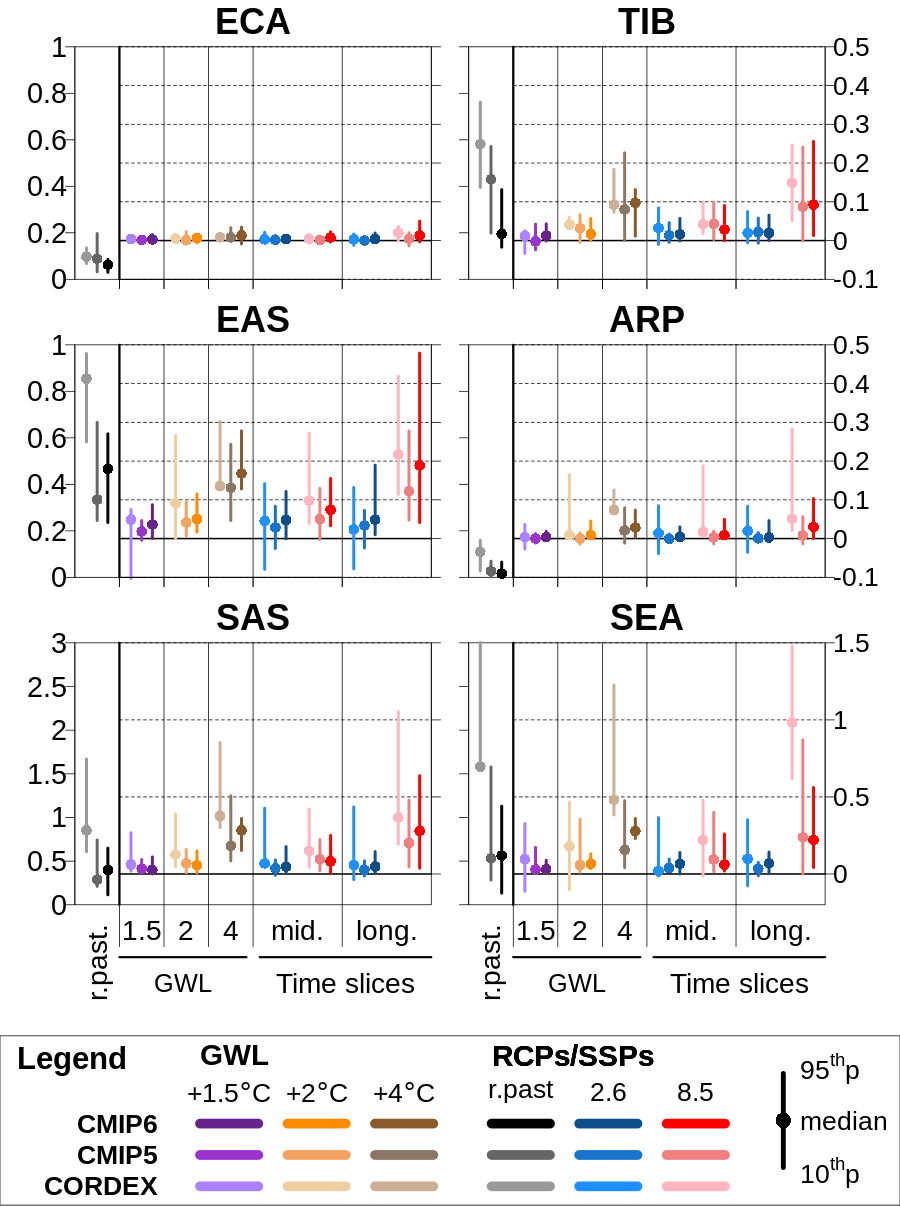

In [12]:
library("IRdisplay")
display_png(file=figname) 

## PDF

In [13]:
figname = paste('/home/jservon/Chapter12_IPCC/figs/Figure_12.6/panel_c_',region,'_Q100_boxplot.pdf',sep='')

pdf(figname, width=9*1.4,height=10.50*1.15*1.4)
mat = t(matrix(1:8,2,4))
mat[4,] = 7
layout(mat, heights=c(1,1,1.35,0.7), widths=c(1,1))
i = 1
for (subregion in continent_regions){
    mar = c(1,1,2.5,1)
    if (subregion %in% c('ECA','EAS','SAS')){
        do_ylab_raw='TRUE'
        mar[2]=4
    }else{
        do_ylab_raw='FALSE'
    }#
    if (subregion %in% c('TIB','ARP','SEA')){
        do_ylab_diff='TRUE'
        mar[4]=4
    }else{
        do_ylab_diff='FALSE'
    }#
    if (subregion %in% c('SAS','SEA')){
        do_xlab='TRUE'
        mar[1] = 5 # -- bottom margin
    }else{
        do_xlab='FALSE'
    }#
    plot_title = subregion
    ylab = ''
    if (subregion %in% c('SAS','SEA')){
        ylims = list(
            ylim_raw = c(0,3),
            ylim_raw_levels = seq(0,3,by=0.5),
            ylim_diff = c(-0.2,1.5),
            ylim_diff_levels = c(0,0.5,1,1.5)
        )           
    }else{
        ylims = list(
            ylim_raw = c(0,1),
            ylim_raw_levels = seq(0,1,by=0.2),
            ylim_diff = c(-0.1,0.5),
            ylim_diff_levels = c(-0.1,0,0.1,0.2,0.3,0.4,0.5)
        )                       
    }#end else MDG

    barplot_satellite_chap12(all_regions[[subregion]],plot_title, ylab, ylims, mar=mar, do_xlab=do_xlab,
                             do_ylab_raw=do_ylab_raw, do_ylab_diff=do_ylab_diff)
    
    i = i + 1
}
draw_legend_box_hor(all_regions[[subregion]], mar=c(0.1,0,2,0))
dev.off()

[1] "modern_raw CORDEX"
[1] 0.0676948 0.0967320 0.1345600
[1] "modern_raw CMIP5"
[1] 0.0319503 0.0888440 0.1965740
[1] "modern_raw CMIP6"
[1] 0.0298055 0.0626176 0.0858882
[1] "1.5 CORDEX"
[1] 0.1640495 0.1737493 0.1873137
[1] "1.5 CMIP5"
[1] 0.1556952 0.1694604 0.1794220
[1] "1.5 CMIP6"
[1] 0.1613237 0.1714355 0.1925328
[1] "2 CORDEX"
[1] 0.1602813 0.1750644 0.1909868
[1] "2 CMIP5"
[1] 0.1594566 0.1678731 0.2052580
[1] "2 CMIP6"
[1] 0.1573698 0.1773676 0.1941660
[1] "4 CORDEX"
[1] 0.1689504 0.1802992 0.1970465
[1] "4 CMIP5"
[1] 0.1629648 0.1802362 0.2219402
[1] "4 CMIP6"
[1] 0.1521882 0.1889000 0.2244205
[1] "2.6_mid CORDEX"
[1] 0.1656474 0.1719578 0.2022848
[1] "2.6_mid CMIP5"
[1] 0.1545723 0.1694685 0.1884040
[1] "2.6_mid CMIP6"
[1] 0.1668431 0.1737652 0.1894317
[1] "8.5_mid CORDEX"
[1] 0.1558952 0.1742062 0.1927452
[1] "8.5_mid CMIP5"
[1] 0.1593570 0.1684748 0.1839578
[1] "8.5_mid CMIP6"
[1] 0.1604636 0.1797222 0.2044490
[1] "2.6_late CORDEX"
[1] 0.1461932 0.1720741 0.1949878
[1] "

png 
  2